<a href="https://colab.research.google.com/github/Prezii/Project/blob/main/Instrumental_response/remove_instrumental_response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Las llegadas son un special case in the graph

##Recomendaciones previas

In [ ]:
import sys
!{sys.executable} -m pip install obspy
import obspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
client = Client("IRIS")
network = "CN" #Canadian National Seismograph Network
station = "PGC"
location="*"
channel= "BHE"

In [ ]:
starttime= UTCDateTime('2015-07-14T02:27:30') 
endtime = starttime + 300 # 5 min = 300 sec

In [ ]:
inv = client.get_stations(network=network, station=station, channel=channel,starttime=starttime,endtime=endtime,level="response")
print(inv)

Inventory created at 2022-09-13T19:43:00.839200Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.49
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2015-07-14...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			CN
		Stations (1):
			CN.PGC (Sidney, BC, CA)
		Channels (1):
			CN.PGC..BHE


In [ ]:
st = client.get_waveforms(network=network, station = station, location = location, channel = channel , starttime=starttime, endtime=endtime, attach_response=True)
st_orig = st.copy()
tr = st[0]
print(tr)

CN.PGC..BHE | 2015-07-14T02:27:30.000000Z - 2015-07-14T02:32:30.000000Z | 40.0 Hz, 12001 samples


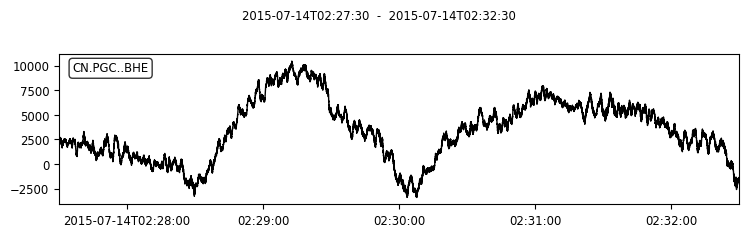

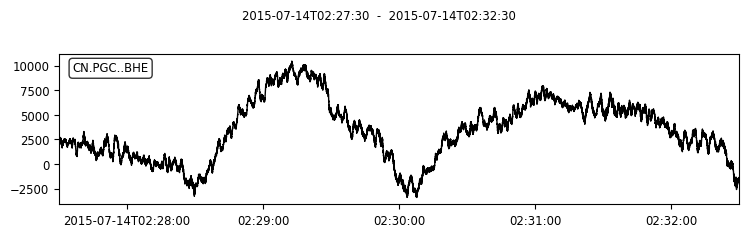

In [ ]:
tr.plot()

In [ ]:
tr.stats

               network: CN
               station: PGC
              location: 
               channel: BHE
             starttime: 2015-07-14T02:27:30.000000Z
               endtime: 2015-07-14T02:32:30.000000Z
         sampling_rate: 40.0
                 delta: 0.025
                  npts: 12001
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 6, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 24576})
            processing: ['ObsPy 1.3.0: trim(endtime=UTCDateTime(2015, 7, 14, 2, 32, 30)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 7, 14, 2, 27, 30))']
              response: Channel Response
	From m/s (velocity in meters per second) to counts (digital counts)
	Overall Sensitivity: 5.09133e+09 defined at 0.100 Hz
	6 stages:
		Stage 1: PolesZerosResponseStage from m/

In [ ]:
print(f"eje x {tr.times()} eje y {tr.data}")


eje x [0.00000e+00 2.50000e-02 5.00000e-02 ... 2.99950e+02 2.99975e+02
 3.00000e+02] eje y [ 2305  2178  2257 ... -1403 -1576 -1501]


In [ ]:
#Poles, Zeros, Gain, sensibility
#Example
#paz_sts2 = {'poles': [-0.037004+0.037016j, -0.037004-0.037016j,
#                     -251.33+0j,
#                      -131.04-467.29j, -131.04+467.29j],
#            'zeros': [0j, 0j],
#            'gain': 60077000.0,
#            'sensitivity': 2516778400.0}

In [ ]:
#Pre fit
pre_filt = (0.002, 0.004, 0.5, 1) #Unitl 18 herts
#Watch if there is good in plot

#Hacer primero el detrend
tr.detrend("demean")
tr.detrend("linear")
tr.taper(0.05)


CN.PGC..BHE | 2015-07-14T02:27:30.000000Z - 2015-07-14T02:32:30.000000Z | 40.0 Hz, 12001 samples

In [ ]:

#respf = "//name of the file//"
#seedresp = {'filename': respf,'date': starttime,'units': 'DIS'}

##Example of seedresp
"""
seedresp = {'filename': respf,  # RESP filename
                # when using Trace/Stream.simulate() the "date" parameter can
                # also be omitted, and the starttime of the trace is then used.
                'date': date,
                # Units to return response in ('DIS', 'VEL' or ACC)
                'units': 'DIS'
                }
"""
# Remove instrument response using the information from the given RESP file
#tr.simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp)
USE REMOVE RESPONSE

##
##st_orig = st.copy()


# plot original and simulated data
tr = st[0]
tr_orig = st_orig[0]
time = tr.times()

plt.subplot(211)
plt.plot(time, tr_orig.data, 'k')
plt.ylabel('STS-2 [counts]')
plt.subplot(212)
plt.plot(time, tr.data, 'k')
plt.ylabel('Displacement [m]')
plt.xlabel('Time [s]')
plt.show()

In [ ]:
            #Parameters of pre-filtering for instrument response removal (careful to fit with resampling sampling rate)
            pre_filt = (0.002, 0.004, 0.5, 1)
            #Band-pass filter limits for final waveforms
            freqmin=0.03
            freqmax=0.09
        
            tr = st.copy()
            # Include station location for further processing
            tr[i].stats.latitude=station_latitude
            tr[i].stats.longitude=station_longitude
        
            if(Plot==True):
              print ("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX Raw trace XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
              tr[i].plot()

        tr[i].detrend("demean")
        tr[i].detrend("linear")
        tr[i].taper(0.05)

        ###First it is necessary to remove the instrument response
        # Response from pzfiles of the SGC
        tr[i].simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp)
        
        #tr[0].simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp1)
        #tr[1].simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp2)
        #tr[2].simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp)
        #try:
            #tr.remove_response(output="DISP",inventory=invresp,pre_filt=pre_filt,plot=Plot)
            #tr.simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp)
        #    tr.data = seisSim(tr.data,tr.stats.sampling_rate,paz_remove=None,remove_sensitivity=False,pre_filt=pre_filt,seedresp=seedresp)
        #except:
        #    tr.remove_response(output="DISP",inventory=inv,pre_filt=pre_filt,plot=Plot)
        #    print (station+" response removed from IRIS metadata")
        
        
        if(Plot==True):
            print ("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX Removed response XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
            tr[i].plot()
        
        #try:
            #We dont need all the points to invert the data. Lancsoz interpolation is the best
            #method to do this but sometimes it doesn't works so we use the exception.
        #    tr.interpolate(sampling_rate=sr, method="lanczos", starttime=tr[0].stats.starttime,
        #                   window="blackman", a=12,time_shift=0.0, npts=pts)
        #except:
        
        tr[i].interpolate(sampling_rate=sr,method="lanczos",window="blackman",a=12,time_shift=0.0)
        
        # tr.resample(sr)

In [ ]:
def nearFieldProcessing(traces,respath,cat,secBeforeP=10,event_depth= 18.0,
                        event_longitude=-76.234, event_latitude=7.238,
                        starttime=obspy.UTCDateTime(2016,9,14,1,58,10),
                        endtime=obspy.UTCDateTime(2016,9,14,3,58,31),Plot=True):
    '''
    Function that process the traces.
    secBeforeP=The time before the p wave arrival.
    secAfterP=The time after the p wave arrival.
    Event depth in km.
    Everything defaults to the mutata earthquake.
    
    It returns a stream object.
    Stream is an object from obspy that saves the data of each trace AFTER PROCESSING IT.
    
    Plot=True if you want to see the complete process
    '''
    

    #Parameters of pre-filtering for instrument response removal (careful to fit with resampling sampling rate)
    pre_filt = (0.002, 0.004, 0.5, 1)
    #Band-pass filter limits for final waveforms
    freqmin=0.03
    freqmax=0.09
    #Resampling parameters: to adjust with synthetics (sampling rate)
    sr=2 #sampling rate
    dt=1.0/sr #delta
    pts=220 #number of points (length of signal * sampling rate)

    
    stream=obspy.Stream()
    for i in range(len(traces)):
        print("Trace number "+str(i+1)+"/"+str(len(traces))+" in stream traces")
        st = traces.copy()
        ###Get data from the seed file
        station=st[i].stats.station
        network=st[i].stats.network
        channel=st[i].stats.channel
        location=st[i].stats.location
        
        filesta = open(respath+"stalocs.txt", 'r')
        lines = filesta.readlines()
        filesta.close()
        for line in lines[1:]:
            p = line.split()
            if p[0] == station:
                station_latitude = float(p[1])
                station_longitude = float(p[2])
                break
        
        ####Get pz info from RESP files provided by the SGC####
        #invresp = read_inventory(respath+"RESP."+network+"."+station+".00.BHZ",format="RESP")
        respf = respath+"RESP."+network+"."+station+"."+location+"."+channel
        seedresp = {'filename': respf,'date': starttime,'units': 'DIS'}
        
        #respf = respath+"RESP."+network+"."+station+".00.BHZ"
        #seedresp = {'filename': respf,'date': starttime,'units': 'VEL'} #VEL or DIS?
        #if os.path.exists(respath+"RESP."+network+"."+station+".00.BH1"):
        #    respf = respath+"RESP."+network+"."+station+".00.BH1"
        #    seedresp1 = {'filename': respf,'date': starttime,'units': 'VEL'} #VEL or DIS?
        #    respf = respath+"RESP."+network+"."+station+".00.BH2"
        #    seedresp2 = {'filename': respf,'date': starttime,'units': 'VEL'} #VEL or DIS?
        #else:
        #    respf = respath+"RESP."+network+"."+station+".00.BHE"
        #    seedresp1 = {'filename': respf,'date': starttime,'units': 'VEL'} #VEL or DIS?
        #    respf = respath+"RESP."+network+"."+station+".00.BHN"
        #    seedresp2 = {'filename': respf,'date': starttime,'units': 'VEL'} #VEL or DIS?
        
        
        #####Station code, distance in degrees, and azimuthal distance.
        
        from obspy.clients.iris import Client
        client = Client()
        distance=client.distaz(stalat=station_latitude, stalon=station_longitude, 
                               evtlat=event_latitude, evtlon=event_longitude)['distance']
        
        ###########################Processing stages################################################################
        ####First we calculate the theoretical p-wave arrivals in order to trim the trace with just pwave.
        m = TauPyModel("ak135f_no_mud")
        arrivals = m.get_ray_paths(source_depth_in_km=event_depth, distance_in_degree=float(distance), phase_list=["ttbasic"])
        arrtmp = m.get_ray_paths(source_depth_in_km=event_depth, distance_in_degree=float(distance), phase_list=["P","S"])
        # Print key arrivals timings to determine the amount of signal you want in the inversion
        print(arrtmp)
        
        if(Plot==True):
            m.get_ray_paths_geo(source_depth_in_km=event_depth, source_latitude_in_deg=event_latitude,
                            source_longitude_in_deg=event_longitude, receiver_latitude_in_deg=station_latitude,
                            receiver_longitude_in_deg=station_longitude, phase_list=["P", "S", "PP"]).plot_rays()
        
        tr = st.copy()
        # Include station location for further processing
        tr[i].stats.latitude=station_latitude
        tr[i].stats.longitude=station_longitude
        
        if(Plot==True):
            print ("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX Raw trace XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
            tr[i].plot()

        tr[i].detrend("demean")
        tr[i].detrend("linear")
        tr[i].taper(0.05)

        ###First it is necessary to remove the instrument response
        # Response from pzfiles of the SGC
        tr[i].simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp)
        
        #tr[0].simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp1)
        #tr[1].simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp2)
        #tr[2].simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp)
        #try:
            #tr.remove_response(output="DISP",inventory=invresp,pre_filt=pre_filt,plot=Plot)
            #tr.simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp)
        #    tr.data = seisSim(tr.data,tr.stats.sampling_rate,paz_remove=None,remove_sensitivity=False,pre_filt=pre_filt,seedresp=seedresp)
        #except:
        #    tr.remove_response(output="DISP",inventory=inv,pre_filt=pre_filt,plot=Plot)
        #    print (station+" response removed from IRIS metadata")
        
        
        if(Plot==True):
            print ("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX Removed response XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
            tr[i].plot()
        
        #try:
            #We dont need all the points to invert the data. Lancsoz interpolation is the best
            #method to do this but sometimes it doesn't works so we use the exception.
        #    tr.interpolate(sampling_rate=sr, method="lanczos", starttime=tr[0].stats.starttime,
        #                   window="blackman", a=12,time_shift=0.0, npts=pts)
        #except:
        
        tr[i].interpolate(sampling_rate=sr,method="lanczos",window="blackman",a=12,time_shift=0.0)
        
        # tr.resample(sr)
        
        if(Plot==True):
            print ("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX Interpolated trace XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
            tr[i].plot()
        
        # Cut window around the P wave arrival using theoretical travel times from Taup.
        origin = cat[0].origins[0]
        first_arrival = origin.time + arrivals[0].time

        trimstarttime=first_arrival-secBeforeP
        trimendtime=first_arrival+secAfterP
        tr[i].trim(trimstarttime,trimendtime)
        
        if(Plot==True):
            print ("XXXXXXXXXXXXXXXXXXXXXXXXX Trimed trace before and after p-arrival XXXXXXXXXXXXXXXXXXXXXX")
            tr[i].plot()
        
        tr[i].filter("bandpass", freqmin=freqmin, freqmax=freqmax, corners=3)
        
        if(Plot==True):
            print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX Filtered Trace XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
            tr[i].plot()
        
        print(station,'Trim start time:', trimstarttime, 'Trim end time:',trimendtime)
        print(station,'Resampled to: dt=',tr[i].stats.delta, 'number of points=',tr[i].stats.npts)
        
        stream+=tr[i]
    
    # Rotation part, we need the traces in the components N, Z and E
    stream2=obspy.Stream()
    # Make a list of stations
    statmp=[]
    for i in range(len(stream)):
        station=stream[i].stats.station
        statmp.append(station)
    
    stalist = list(set(statmp))
    
    st = stream.copy()
    for i in range(len(stalist)):
        tr=st.select(station=stalist[i])
        
        # List of components of this station
        chalist=[]
        for i in range(len(tr)):
            channel=tr[i].stats.channel
            chalist.append(channel)
            # From SGC inventory.xml file, H2 and H1 seems to be rotated already in E and N
            if tr[i].stats.channel == 'HH1':
                tr[i].stats.channel='HHN'
            if tr[i].stats.channel == 'HH2':
                tr[i].stats.channel='HHE'
            if tr[i].stats.channel == 'BH1':
                tr[i].stats.channel='BHN'
            if tr[i].stats.channel == 'BH2':
                tr[i].stats.channel='BHE'
        
        station=tr[0].stats.station
        if 'HHE' in chalist or 'BHE' in chalist:
            stream2+=tr
            print("Data already rotated for station "+station)
            continue
                
        stream2+=tr
        
    return stream2
